In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data from the csv file 
# download the train dataset from: https://www.kaggle.com/c/digit-recognizer/data
df = pd.read_csv('train.csv')

In [3]:
# see the data and check if it loaded perfectly
df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape # check the shape of the loaded dataframe

(42000, 785)

In [6]:
# taking a part of dataframe for testing out my PCA
input = df[:15000].copy()

# saving my labels into another variable for future reference
label=df['label']

In [7]:
# dropping the label column from my feature set 
input.drop('label',axis=1,inplace=True)
input.shape # confirming the drop was sucessful

(15000, 784)

3


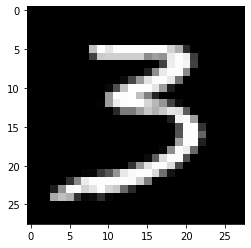

In [13]:
# checking the dataset by making the pixel image using imshow.
i=25
print(label.iloc[i])
flat = input.iloc[i]
matrix = flat.to_numpy()
matrix = matrix.reshape((28,28))
plt.imshow(matrix,cmap='gray')
plt.show()

In [14]:
# Standarized the data import the standard scalar from sklear.Preprocessing library
# this is important step and copulsory step in PCA
from sklearn.preprocessing import StandardScaler

In [15]:
standardised_data = StandardScaler().fit_transform(input)
standardised_data # this var holds the standarized data 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# calculate covariance matrix : S = (X^T.X)/n
cov_mat = np.matmul(standardised_data.T,standardised_data)*1/15000
cov_mat # this covariance matrix is useul for calculating eighen values and eighen vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
standardised_data.shape 

(15000, 784)

In [32]:
# calculate eighen values and eigen vectors
from scipy.linalg import eigh

In [33]:
eigh_val,eigh_vec = eigh(cov_mat,eigvals=(782,783))  # calculating only top 2 eigen values and corresponding eigen

In [34]:
eigh_vec.shape

(784, 2)

In [36]:
sum(eigh_val) # explains 69% variance using only top 2 eigen vectors when all the datapoints are projected on these 2 eigen vectors

69.4167899726071

In [37]:
# here standardised_data(15000,784) eigh_vec (784,2) results in arr(15000,2) these 2 features are our 2 principal component
arr = np.matmul(standardised_data,eigh_vec)


In [42]:
# converting arr to dataframe with 2 columns PC-1 ,PC-2 which represents our top principal components.
df_final = pd.DataFrame(arr,columns=['pc_2','pc_1'])
# attaching the corresponding output label which we saved earlier.
df_final['label'] = label

In [43]:
df_final.head() # this dataframe is our dimentionality reduced dataframe from 784 dim to 2 dims.

,pc_2,pc_1,label
0,-5.558661,-5.043558,1
1,6.193635,19.305278,0
2,-1.909878,-7.678775,1
3,5.525748,-0.464845,4
4,6.366527,26.644289,0


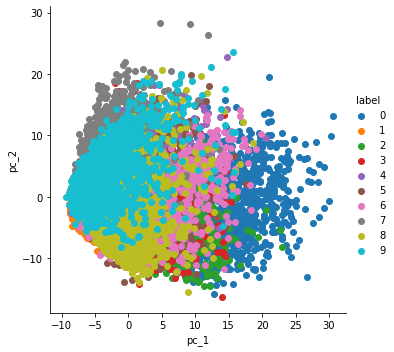

In [44]:
# visualise our dataset by plotting 2D scatterplot
import seaborn as sns
sns.FacetGrid(df_final,hue='label',height=5).map(plt.scatter,'pc_1','pc_2').add_legend()

## using scikit inbuild PCA method

In [45]:
from sklearn import decomposition

In [47]:
pca = decomposition.PCA()  # initialise the PCA method from decomposition.
pca.n_components = 2
pca_data = pca.fit_transform(standardised_data)

print(pca_data.shape)

(15000, 2)


In [48]:
df_final1 = pd.DataFrame(pca_data,columns=['pc_1','pc_2'])

In [51]:
df_final1.shape

(15000, 2)

In [52]:
df_final1['label'] = label

In [53]:
df_final1.head()

,pc_1,pc_2,label
0,-5.043614,-5.558964,1
1,19.305351,6.193560,0
2,-7.678681,-1.909645,1
3,-0.464782,5.525817,4
4,26.644322,6.366587,0


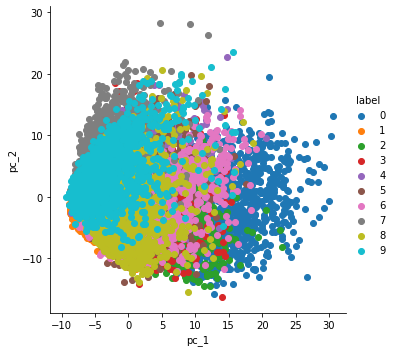

In [56]:
sns.FacetGrid(df_final1,hue='label',height=5).map(plt.scatter,'pc_1','pc_2').add_legend()
plt.show()